In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from random import random
from pmdarima.arima import auto_arima

In [2]:
Y = pd.read_csv('Dataset/industry_demand_child_q.csv', parse_dates=['Time'])
X = pd.read_csv('Dataset/cleaned_predictors.csv', parse_dates=['Time'])

In [3]:
Y.head()

,Time,"Food, Beverages & Tobacco",Paper/Rubber/Plastic Products & Printing,"Petroleum, Chemical & Pharmaceutical Products","Fabricated Metal Products, Machinery & Equipment","Electronic, Computer & Optical Products",Transport Equipment,Other Manufacturing Industries,Construction,Wholesale Trade,...,Architectural & Engineering Services,Other Professional Services,Security & Investigation,Cleaning & Landscaping,Other Administrative & Support Services,Public Administration & Education,Health & Social Services,"Arts, Entertainment & Recreation","Other Community, Social & Personal Services",Others
0,2006-04-01,300,500,400,2400,3000,2000,700,2200,1600,...,600,400,800,400,600,4100,1200,500,300,500
1,2006-07-01,300,500,300,2200,2800,1800,600,1400,1900,...,500,300,1100,600,500,4300,1200,600,400,300
2,2006-10-01,400,500,300,2800,2100,1500,400,1900,2300,...,700,400,1100,400,500,3900,1300,600,600,200
3,2007-01-01,300,600,400,2700,2400,1900,700,1800,2400,...,700,400,1200,500,500,4400,1500,600,600,200
4,2007-04-01,400,500,500,2000,2000,2200,800,2400,2800,...,1000,700,1500,200,300,5500,1600,700,600,600


In [4]:
modelDict = {}
TEST_SIZE = 1

for col in Y.columns:
    if col == 'Time':
        continue
        
    print(f"Fitting Auto Arima to {col}")
    tempY = Y[col]

    train, test = tempY.iloc[:-TEST_SIZE], tempY.iloc[-TEST_SIZE:]

    model = auto_arima(train, start_p=1, start_q=1,
                          test='adf',
                          max_p=10, max_q=10,    
                          seasonal=True,   
                          D=None, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    
    modelDict[col] = model
    print('----------------------------------------------------------')
    print()

Fitting Auto Arima to Food, Beverages & Tobacco
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=869.348, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=875.951, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=871.055, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=867.374, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=874.674, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=869.320, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=870.068, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=867.713, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.292 seconds
----------------------------------------------------------

Fitting Auto Arima to Paper/Rubber/Plastic Products & Printing
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=836.066, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=836.415, Time=0.01 sec
 ARIMA(1,1,0)(0,

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=903.464, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=899.554, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=901.554, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=901.554, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=901.133, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.286 seconds
----------------------------------------------------------

Fitting Auto Arima to Air Transport & Supporting Services
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=910.464, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=908.199, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=908.474, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=908.528, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=906.295, Time

 ARIMA(1,2,2)(0,0,0)[0]             : AIC=940.002, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.177 seconds
----------------------------------------------------------

Fitting Auto Arima to Architectural & Engineering Services
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=888.930, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=930.840, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=904.333, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=888.707, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=889.244, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=890.897, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.134 seconds
----------------------------------------------------------

Fitting Auto Arima to Other Professional Servic

C:\Users\fiat\AppData\Local\Temp\ipykernel_8992\427733193.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(15, 5))


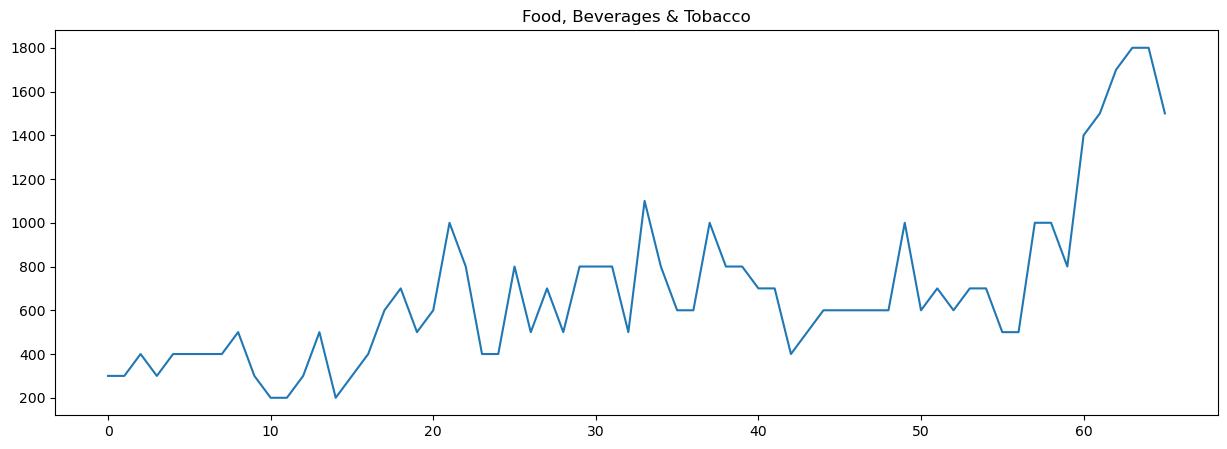

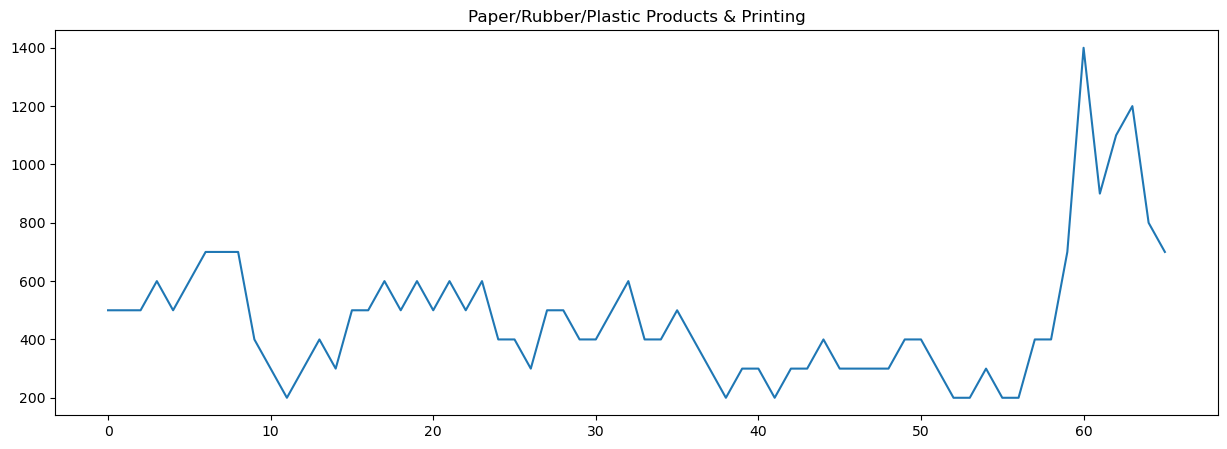

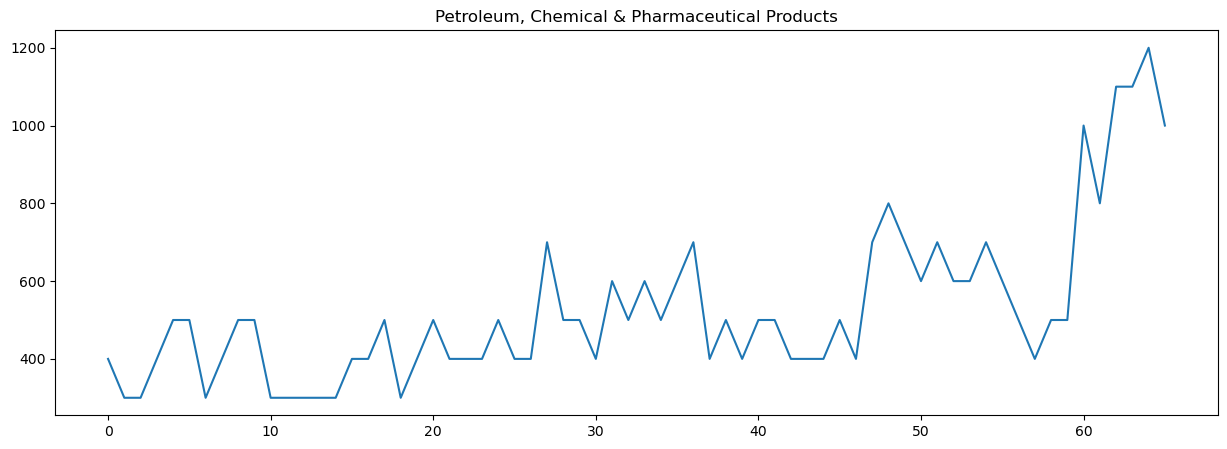

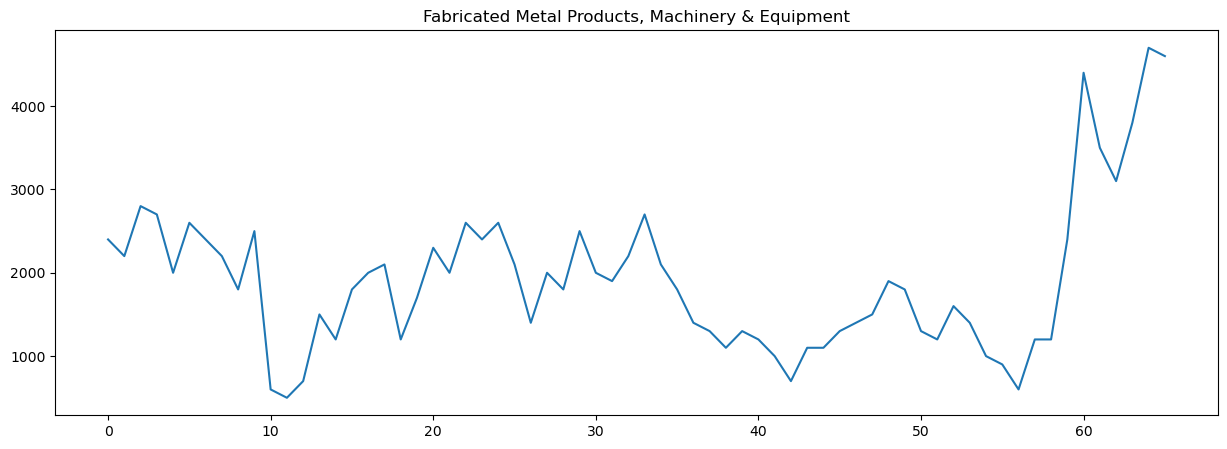

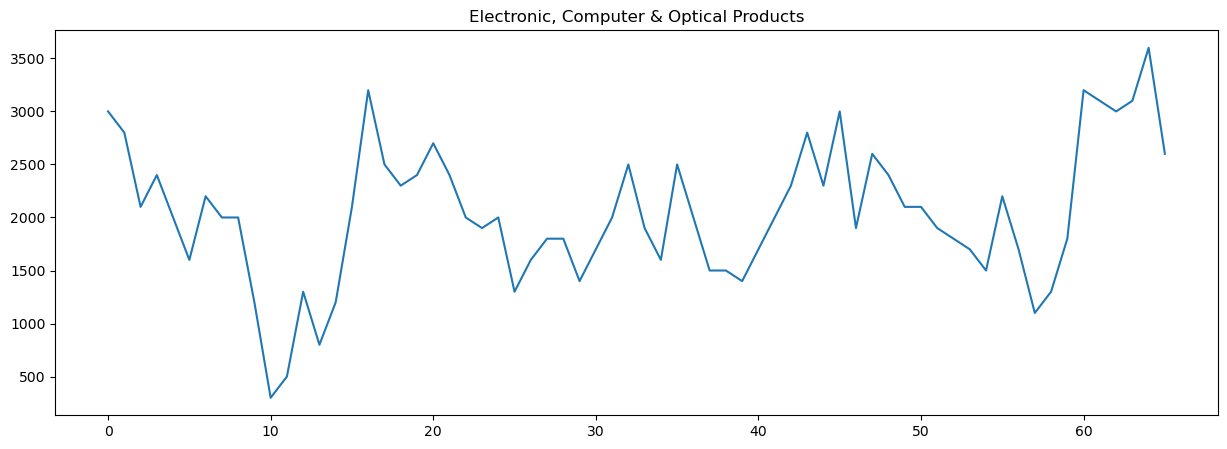

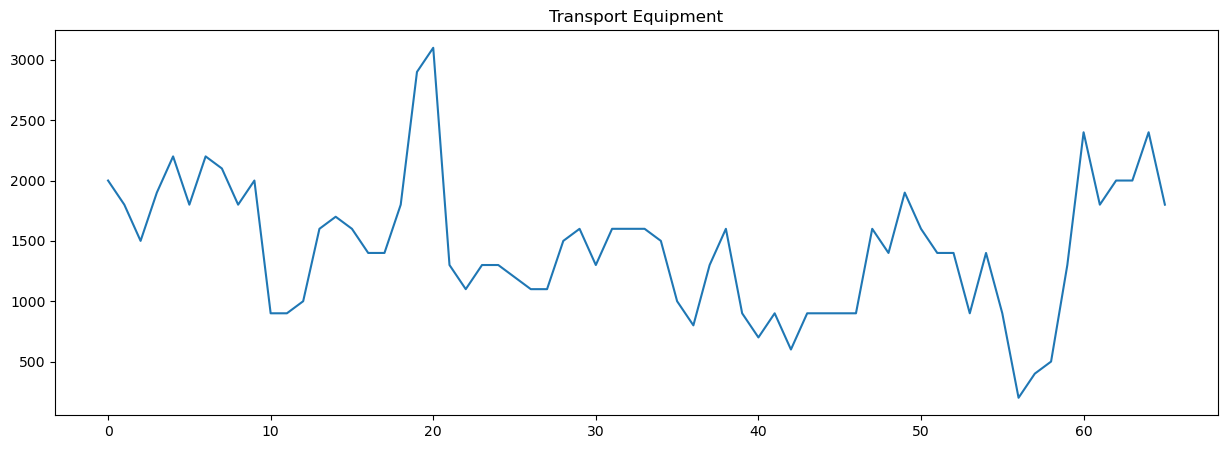

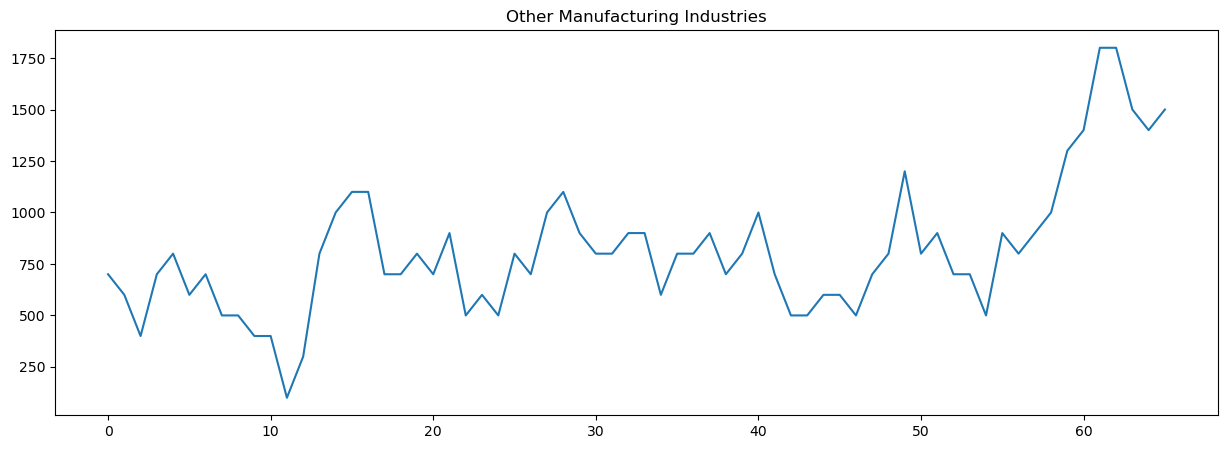

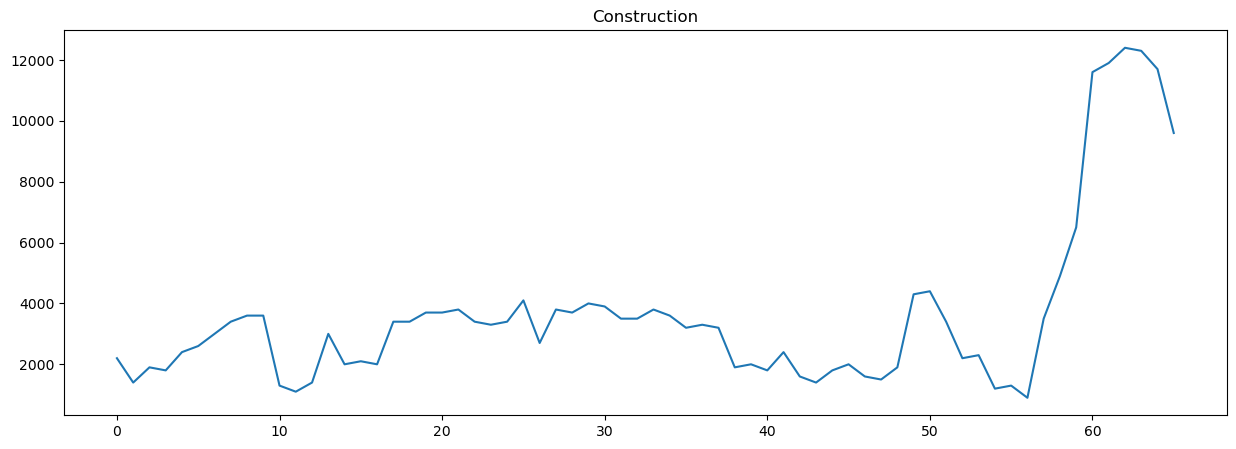

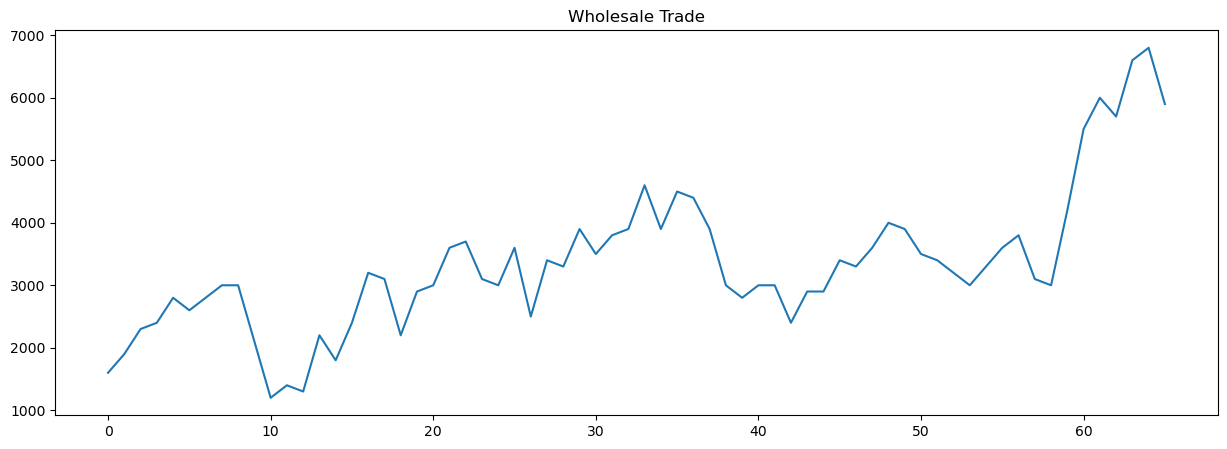

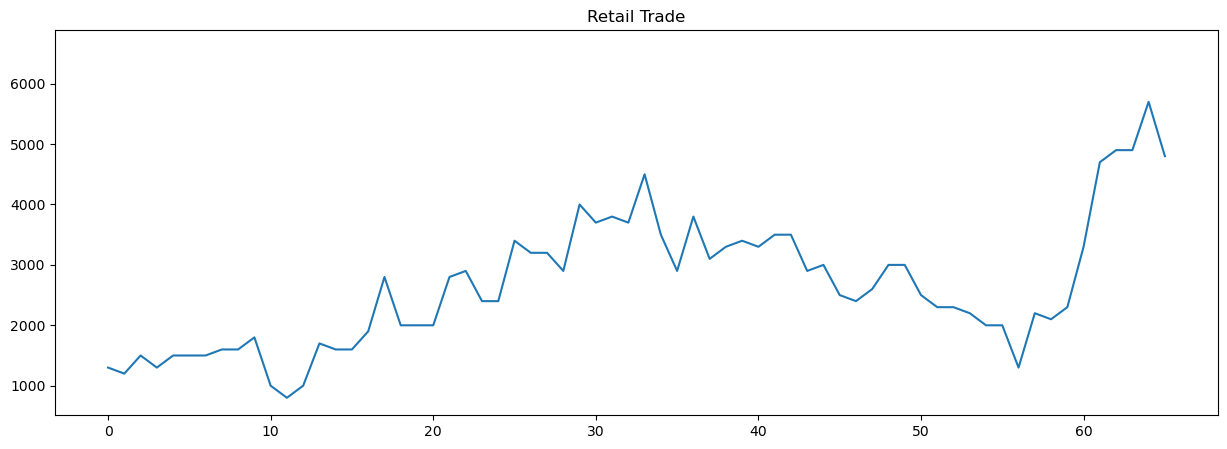

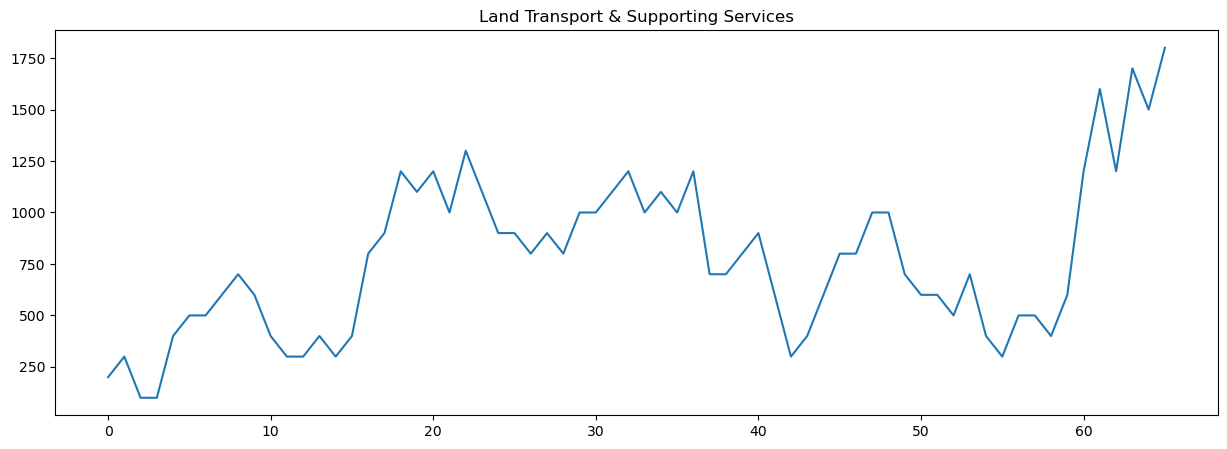

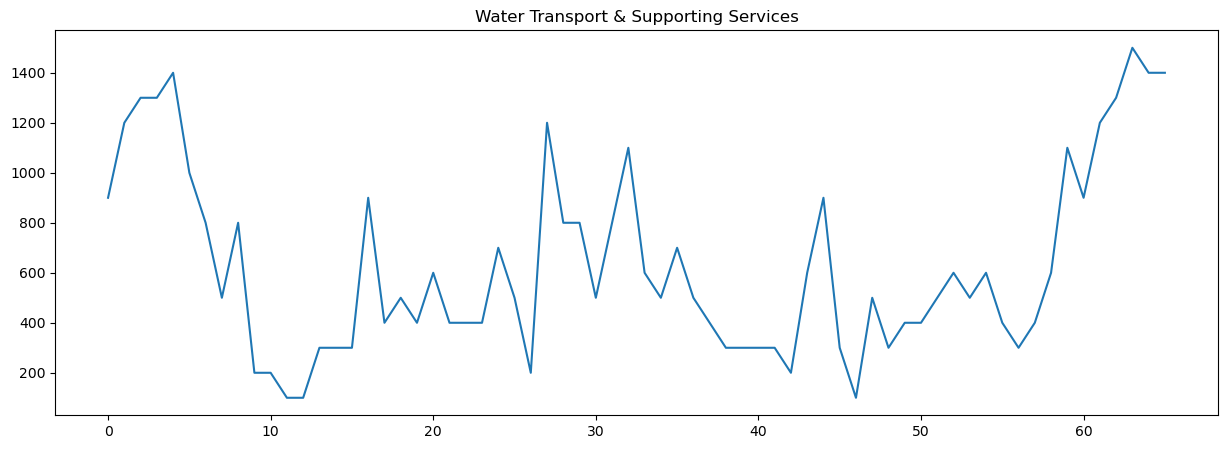

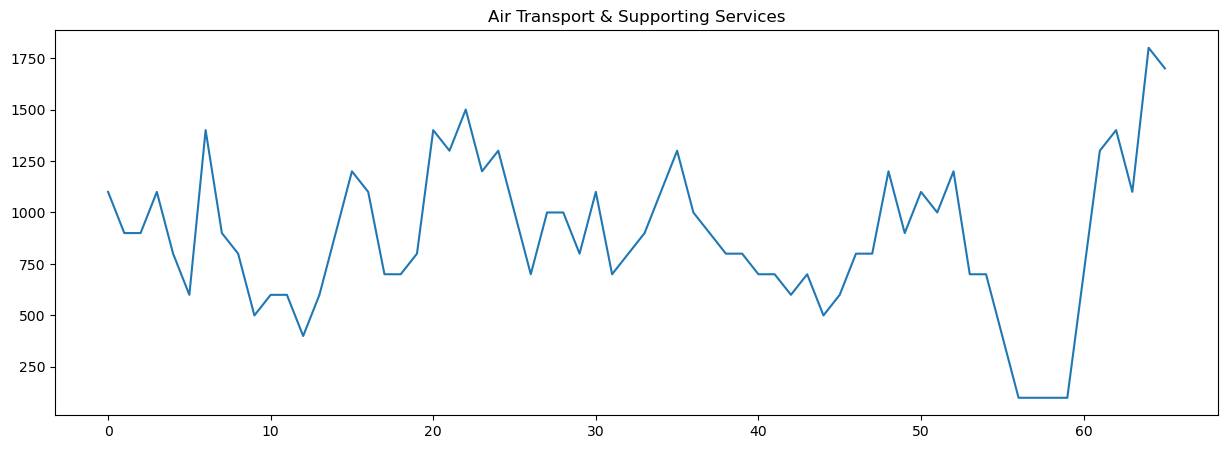

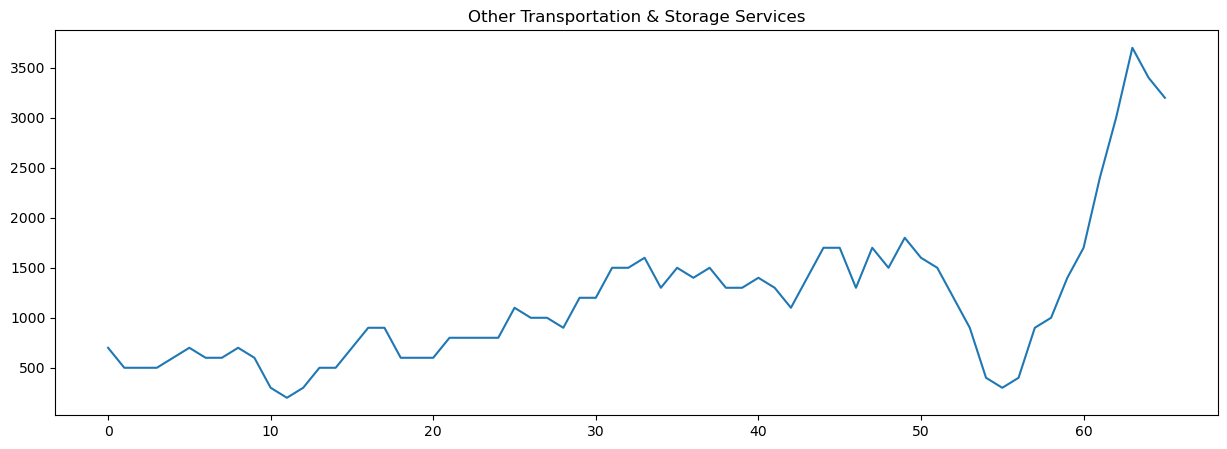

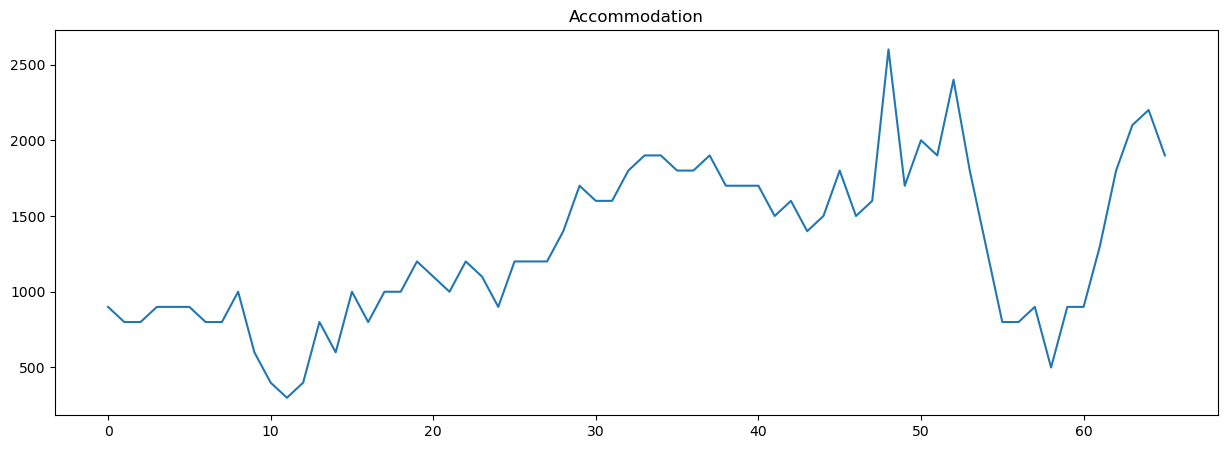

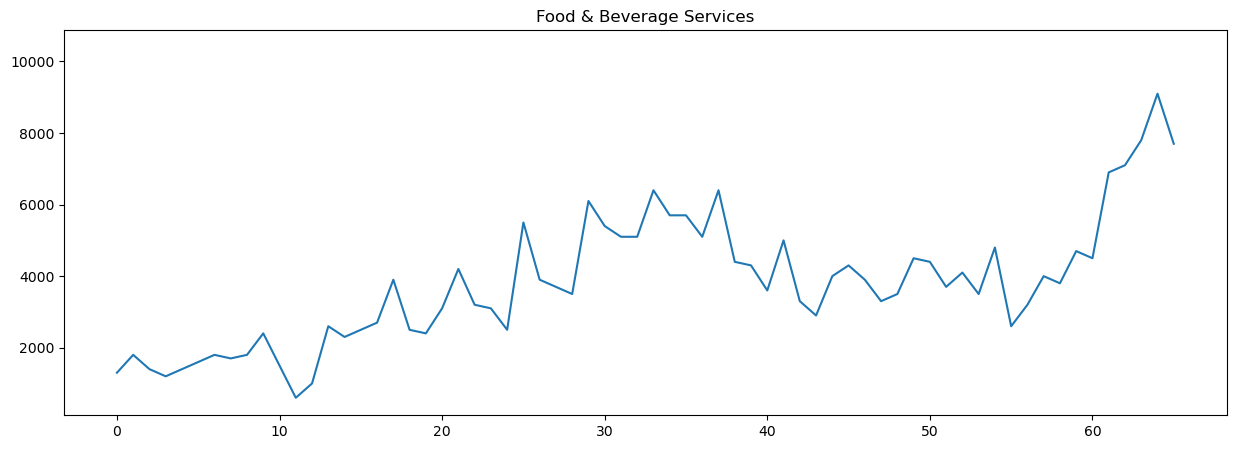

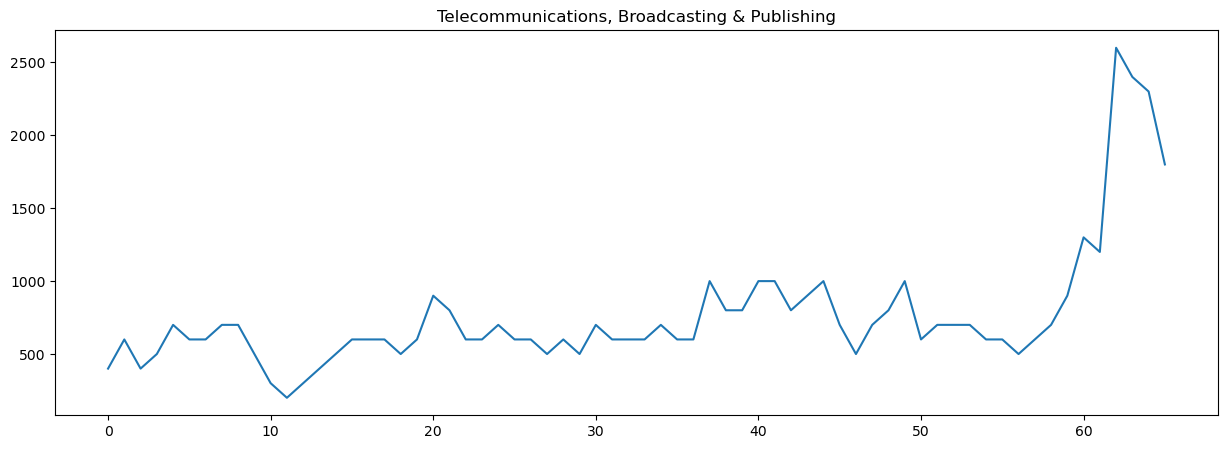

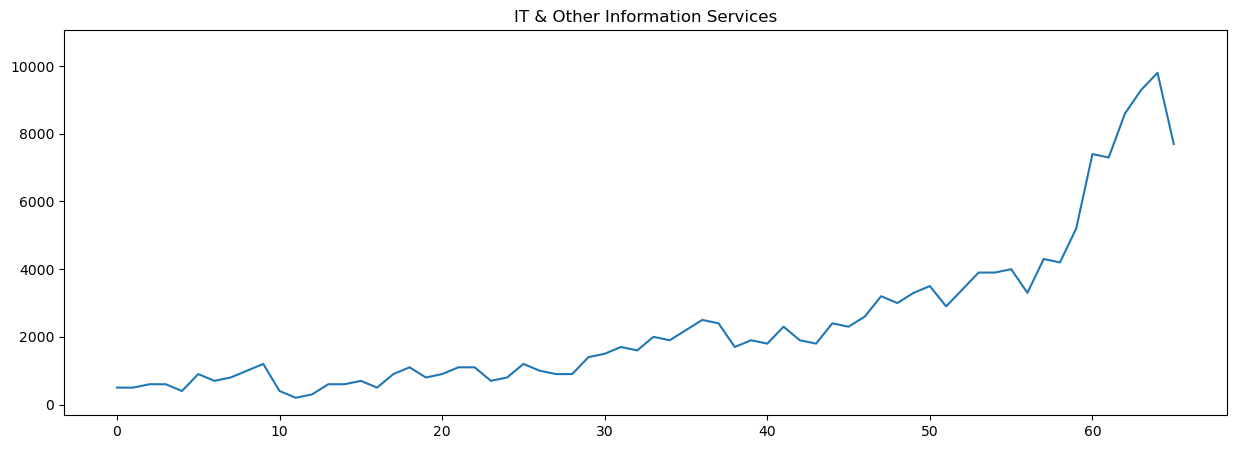

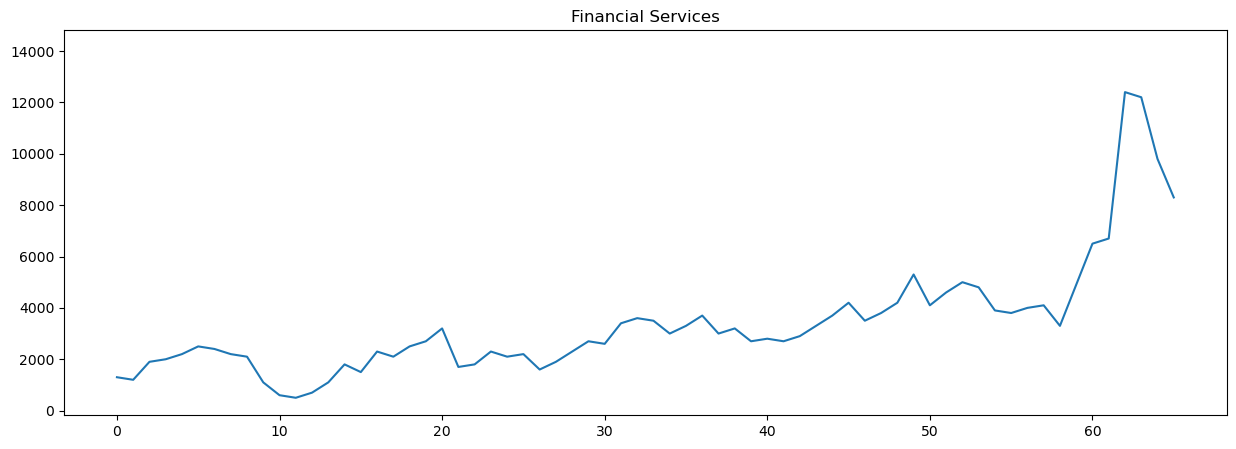

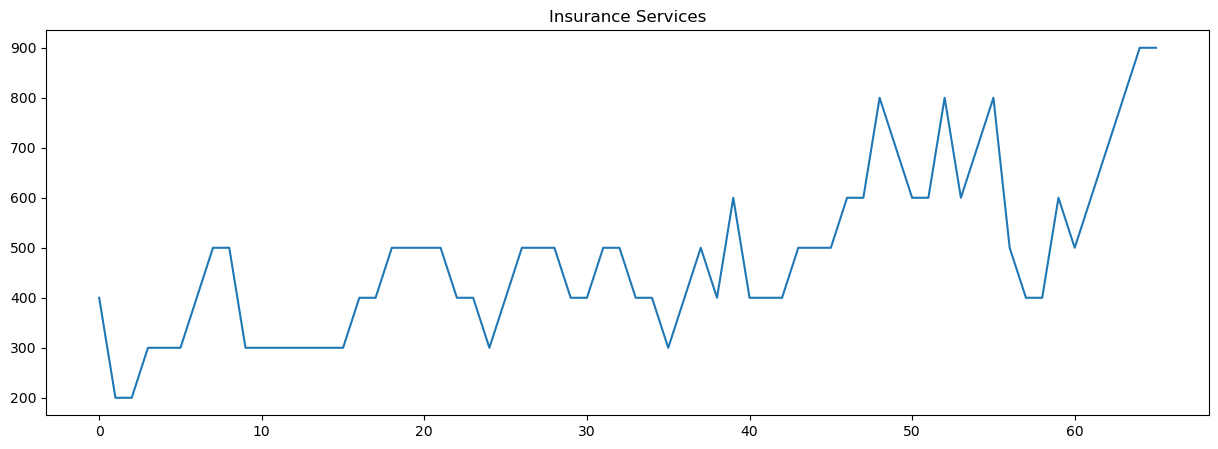

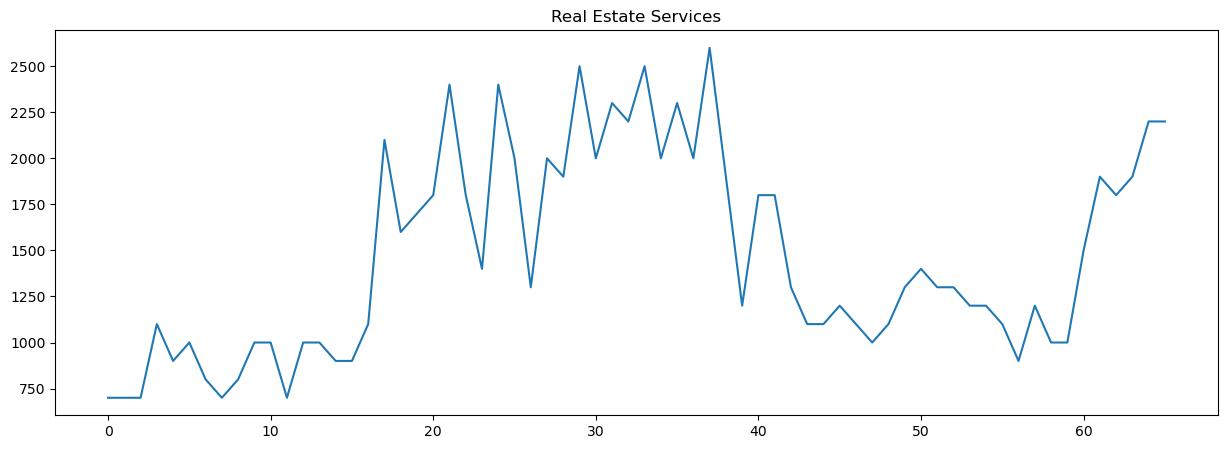

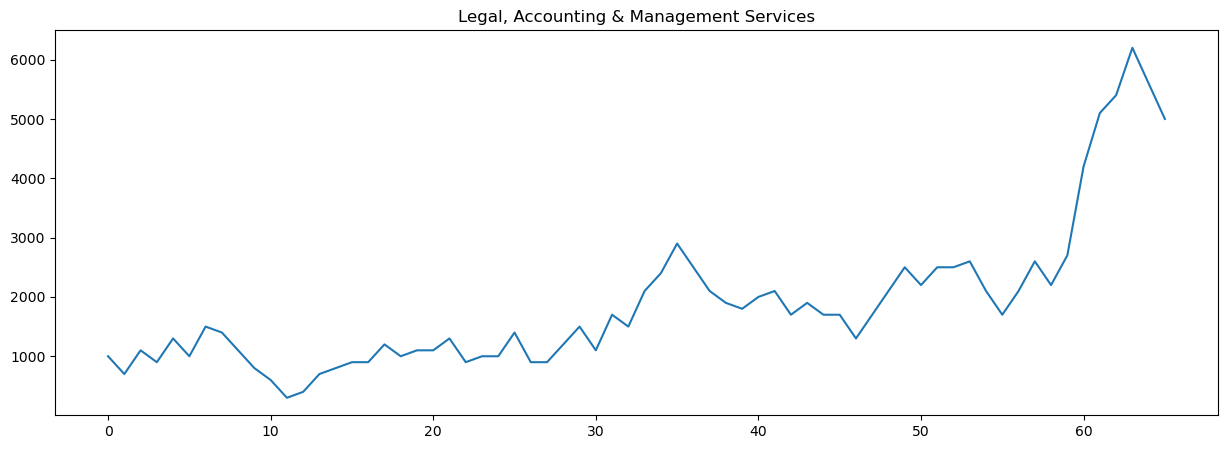

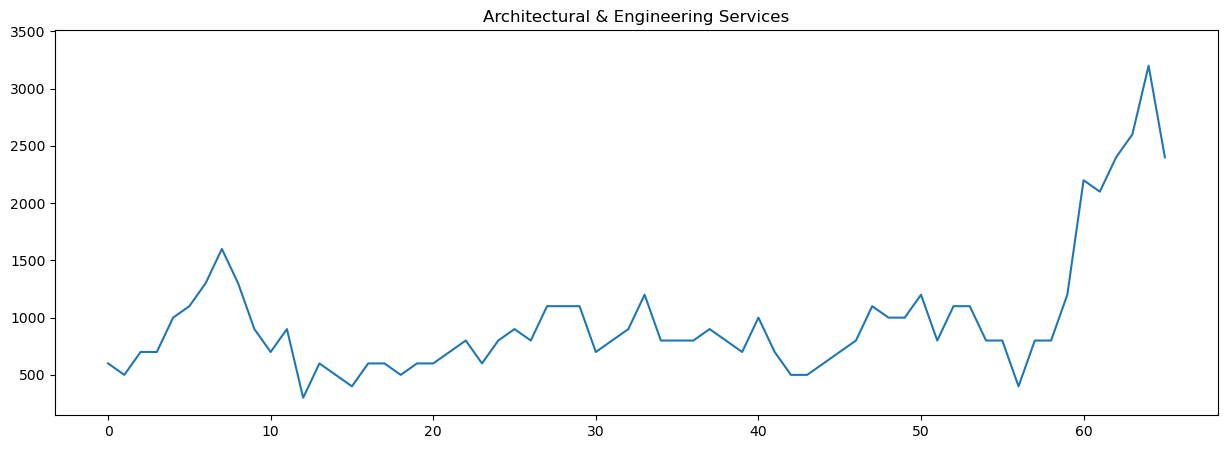

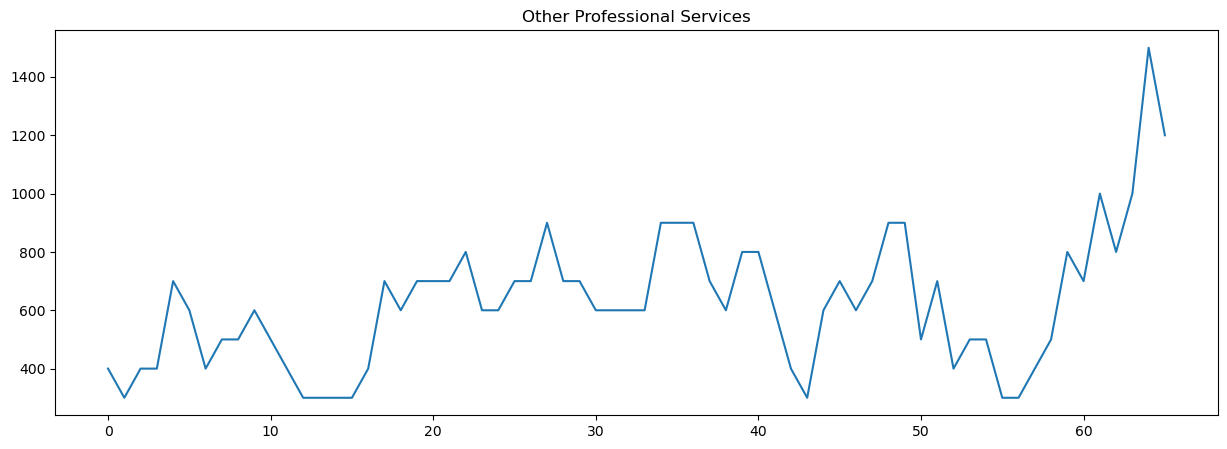

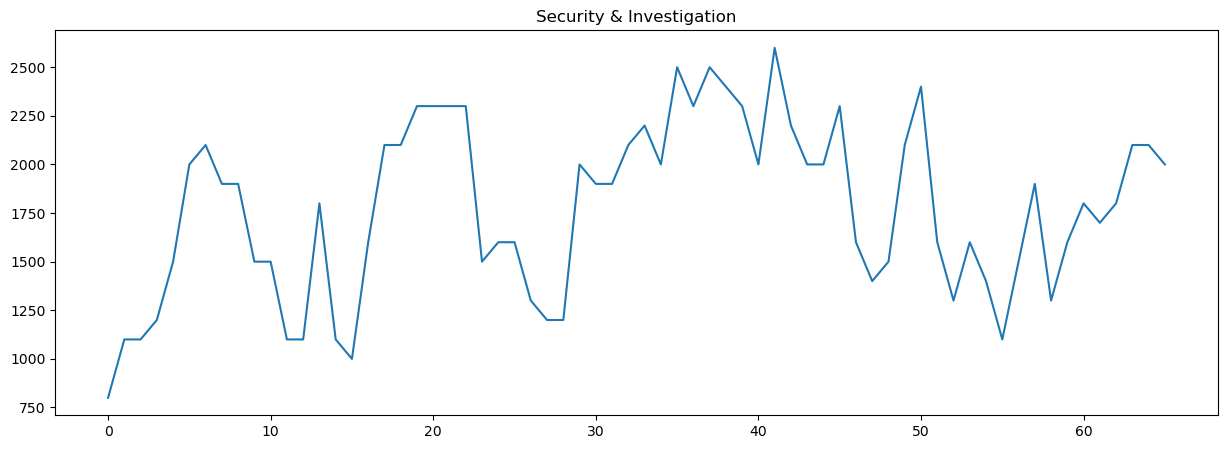

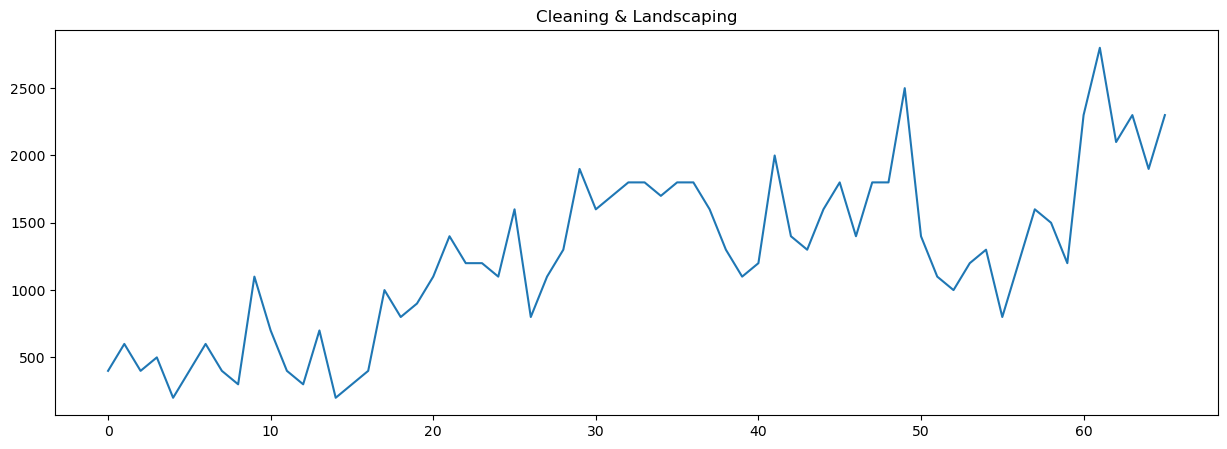

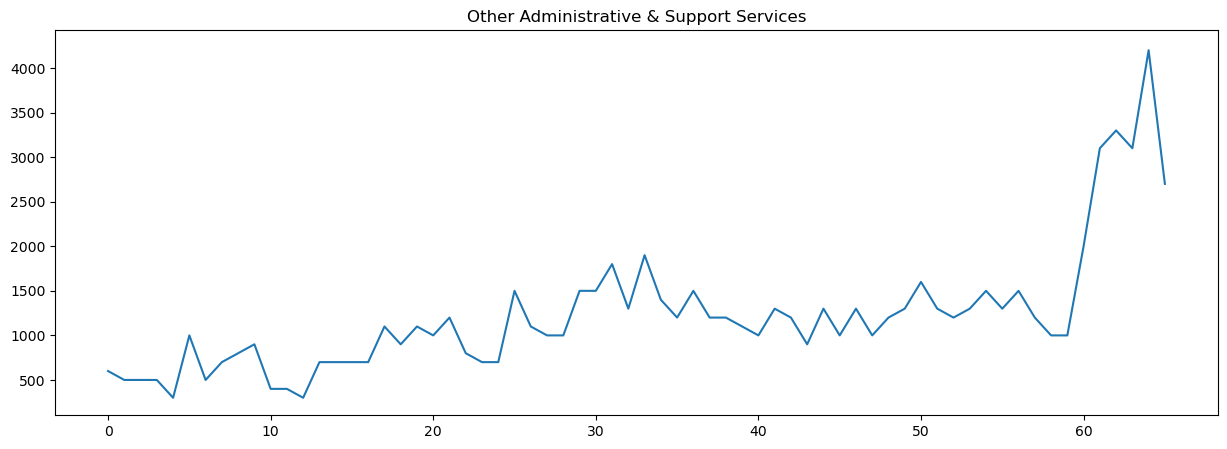

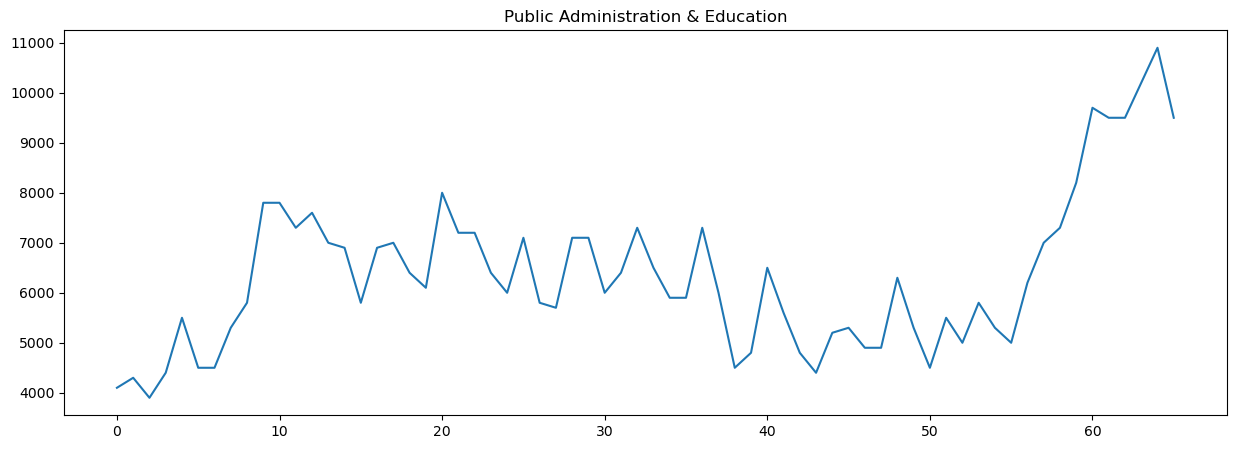

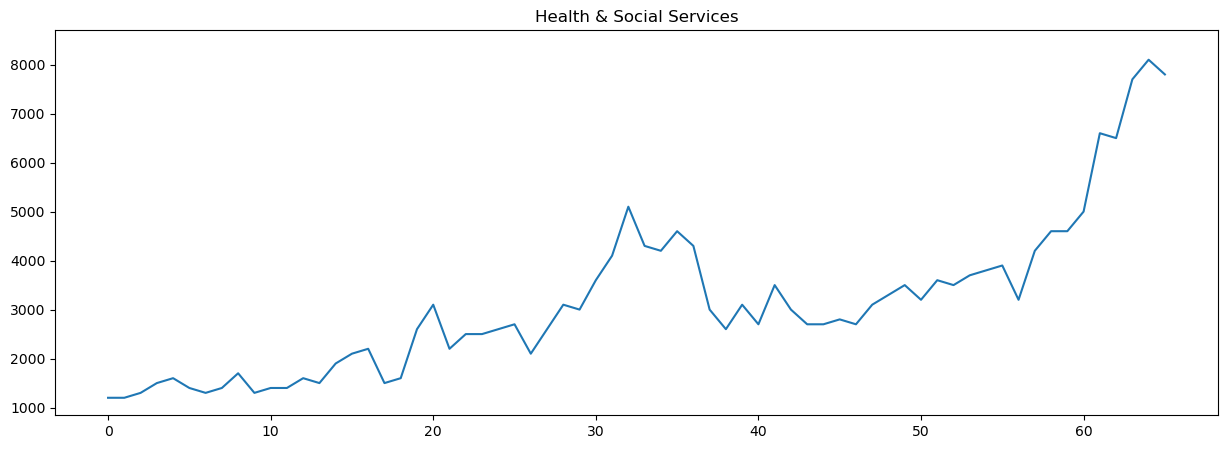

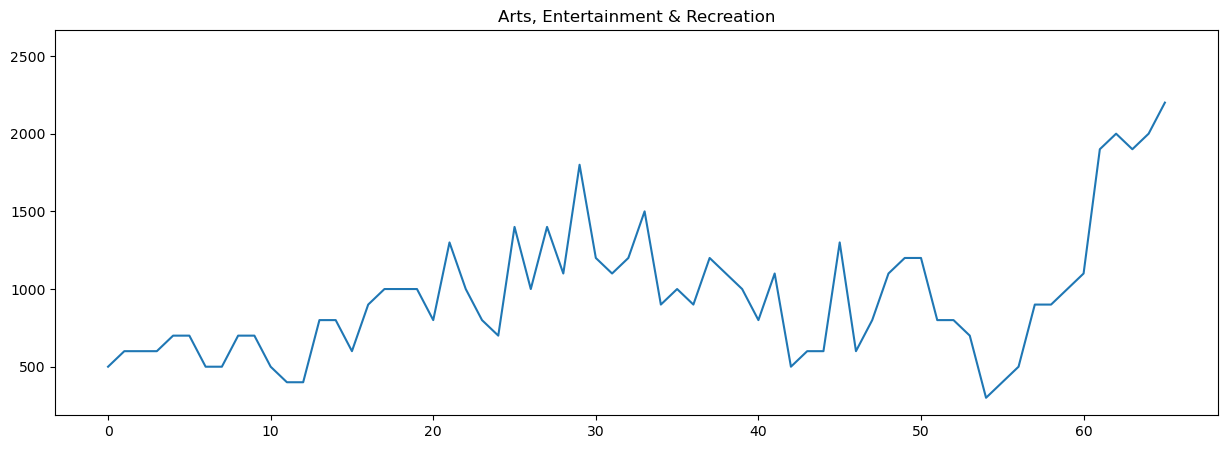

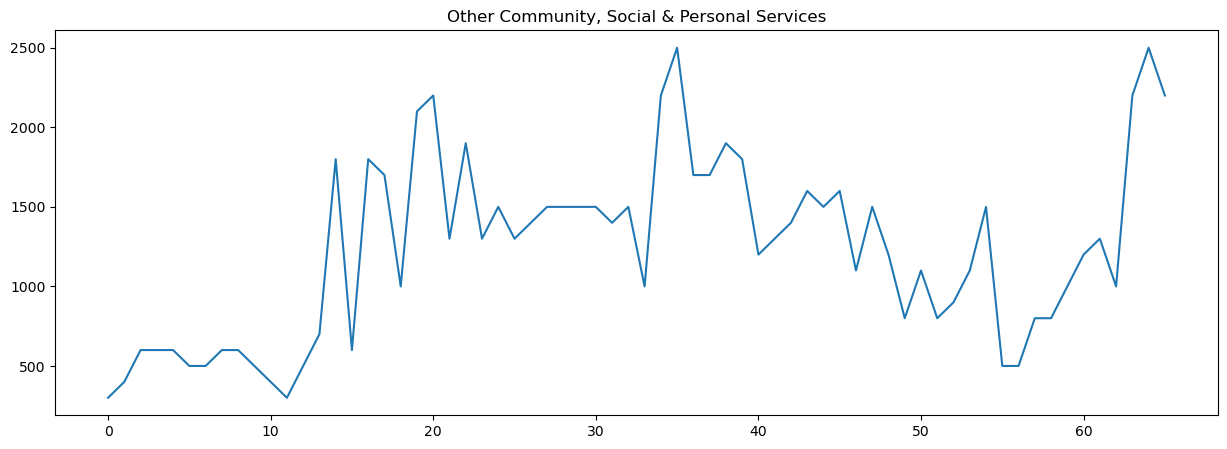

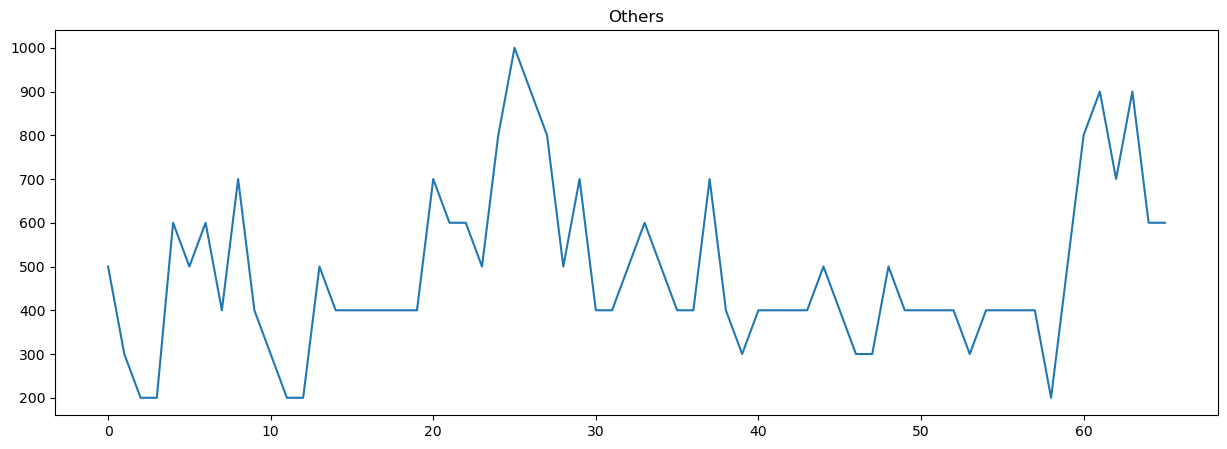

In [5]:
for col in Y.columns:
    if col == 'Time':
        continue
    
    prediction, confint = modelDict[col].predict(n_periods=TEST_SIZE, return_conf_int=True)
    cf= pd.DataFrame(confint)
    
    prediction_series = pd.Series(prediction,index=test.index)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.set_title(col)
    ax.plot(Y[col])
    ax.plot(prediction_series)
    #ax.fill_between(prediction_series.index,
    #                cf[0],
    #                cf[1],color='grey',alpha=.3)

### Auto ARIMA models do not work very well, try using external variables to improve predictions

In [6]:
modelExoDict = {}

for col in Y.columns:
    if col == 'Time':
        continue
        
    print(f"Fitting Auto Arima to {col}")
    tempY = Y[col]

    train, test = tempY.iloc[:-TEST_SIZE], tempY.iloc[-TEST_SIZE:]

    model = auto_arima(train, start_p=1, start_q=1,
                       exogenous=X.iloc[:-TEST_SIZE],
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True)
    
    modelExoDict[col] = model
    print('----------------------------------------------------------')
    print()

Fitting Auto Arima to Food, Beverages & Tobacco
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=869.348, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=875.951, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=871.055, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=867.374, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=874.674, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=869.320, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=870.068, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=867.713, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.231 seconds
----------------------------------------------------------

Fitting Auto Arima to Paper/Rubber/Plastic Products & Printing
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=845.067, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=895.481, Time=0.01 sec
 ARIMA(1,0,0)(0,

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=885.107, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=886.073, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.210 seconds
----------------------------------------------------------

Fitting Auto Arima to Water Transport & Supporting Services
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=914.668, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=955.285, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=915.035, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=931.926, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1041.385, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=916.726, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=916.593, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=924.658, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=914.90

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=941.328, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=951.027, Time=0.02 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=943.088, Time=0.09 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=943.696, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=950.204, Time=0.06 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=943.439, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=942.894, Time=0.08 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 1.001 seconds
----------------------------------------------------------

Fitting Auto Arima to Legal, Accounting & Management Services
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=954.457, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=950.817, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=952.697, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=952.7

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=976.983, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1011.308, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=981.624, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=992.763, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1122.515, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=978.889, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=978.720, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=992.050, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=979.365, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=981.202, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=978.483, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.383 seconds
----------------------------------------------------------

Fitting Auto Arima to Others
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=842.656, Time=0.01 sec
 ARIMA(0,

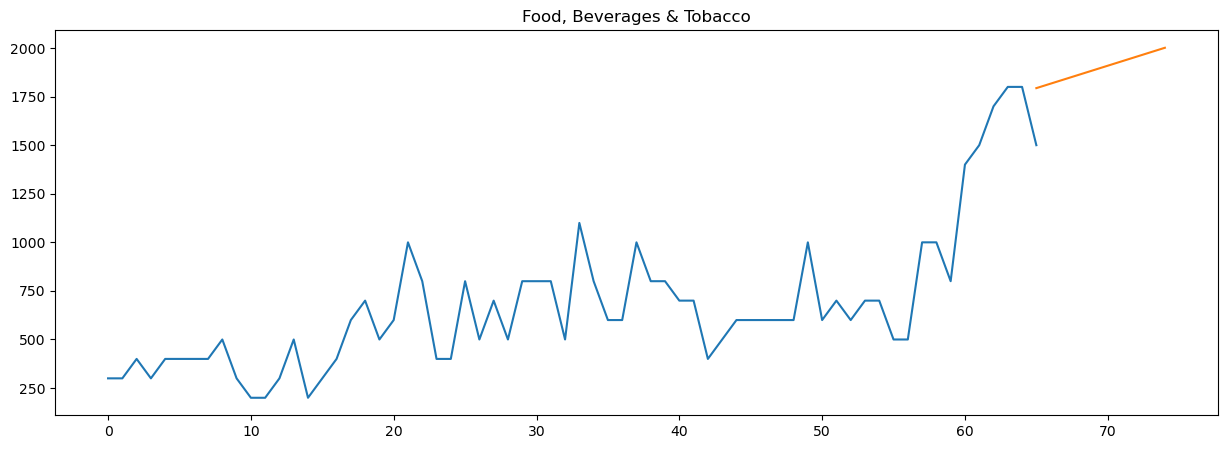

In [7]:
for col in Y.columns[0:2]:
    if col == 'Time':
        continue
    
    prediction = modelExoDict[col].predict(dynamic=True, exogenous=X)
    cf= pd.DataFrame(confint)
    
    prediction_series = pd.Series(prediction)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.set_title(col)
    ax.plot(Y[col])
    ax.plot(prediction)

In [8]:
modelDict['Food, Beverages & Tobacco'].predict()

65    1793.675945
66    1816.749775
67    1839.823604
68    1862.897434
69    1885.971263
70    1909.045093
71    1932.118922
72    1955.192752
73    1978.266581
74    2001.340411
dtype: float64

In [9]:
model = ARIMA(Y['Food, Beverages & Tobacco'], order=(2,1,2))

NameError: name 'ARIMA' is not defined

In [ ]:
Y['Time']